<a href="https://colab.research.google.com/github/1zpzz/QM2-Website-/blob/main/Geogres'%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

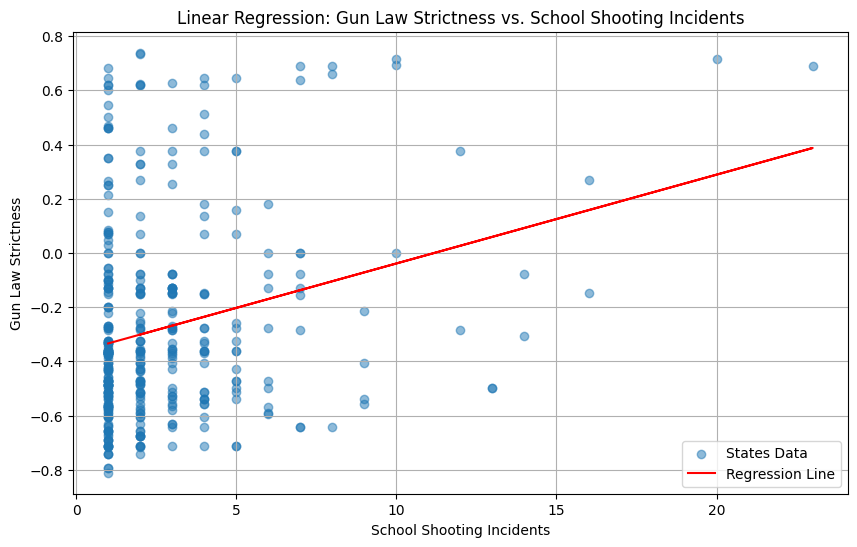

                            OLS Regression Results                            
Dep. Variable:             Strictness   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           2.90e-07
Time:                        13:19:35   Log-Likelihood:                -145.07
No. Observations:                 395   AIC:                             294.1
Df Residuals:                     393   BIC:                             302.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3667      0.024    -15.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

shooting_data_file = "/content/public v3 .csv"
law_data_file = "/content/State_Gun_law.csv"
shooting_df = pd.read_csv(shooting_data_file, delimiter=';')
law_df = pd.read_csv(law_data_file, delimiter=';')

incident_counts_yearly = shooting_df.groupby(['Year', 'state']).size().reset_index(name='incident_count')

law_years = [str(year) for year in range(2006, 2022)]
law_melted = law_df.melt(id_vars=['State', 'Abbreviation'], value_vars=law_years,
                         var_name='Year', value_name='Strictness')
law_melted['Year'] = pd.to_numeric(law_melted['Year'], errors='coerce')
law_melted['Strictness'] = pd.to_numeric(law_melted['Strictness'], errors='coerce')

merged_yearly_df = pd.merge(incident_counts_yearly, law_melted, left_on=['state', 'Year'], right_on=['Abbreviation', 'Year'])

# Scatter plot of all states over the years with regression line
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(merged_yearly_df['incident_count'], merged_yearly_df['Strictness'], alpha=0.5, label='States Data')

# Linear regression: Strictness ~ Incident Counts
X = merged_yearly_df['incident_count']
y = merged_yearly_df['Strictness']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot regression line
ax.plot(merged_yearly_df['incident_count'], predictions, color='red', label='Regression Line')

# Labels and title
ax.set_xlabel('School Shooting Incidents')
ax.set_ylabel('Gun Law Strictness')
ax.set_title('Linear Regression: Gun Law Strictness vs. School Shooting Incidents')
ax.legend()
ax.grid(True)

plt.show()

# Display regression summary
print(model.summary())

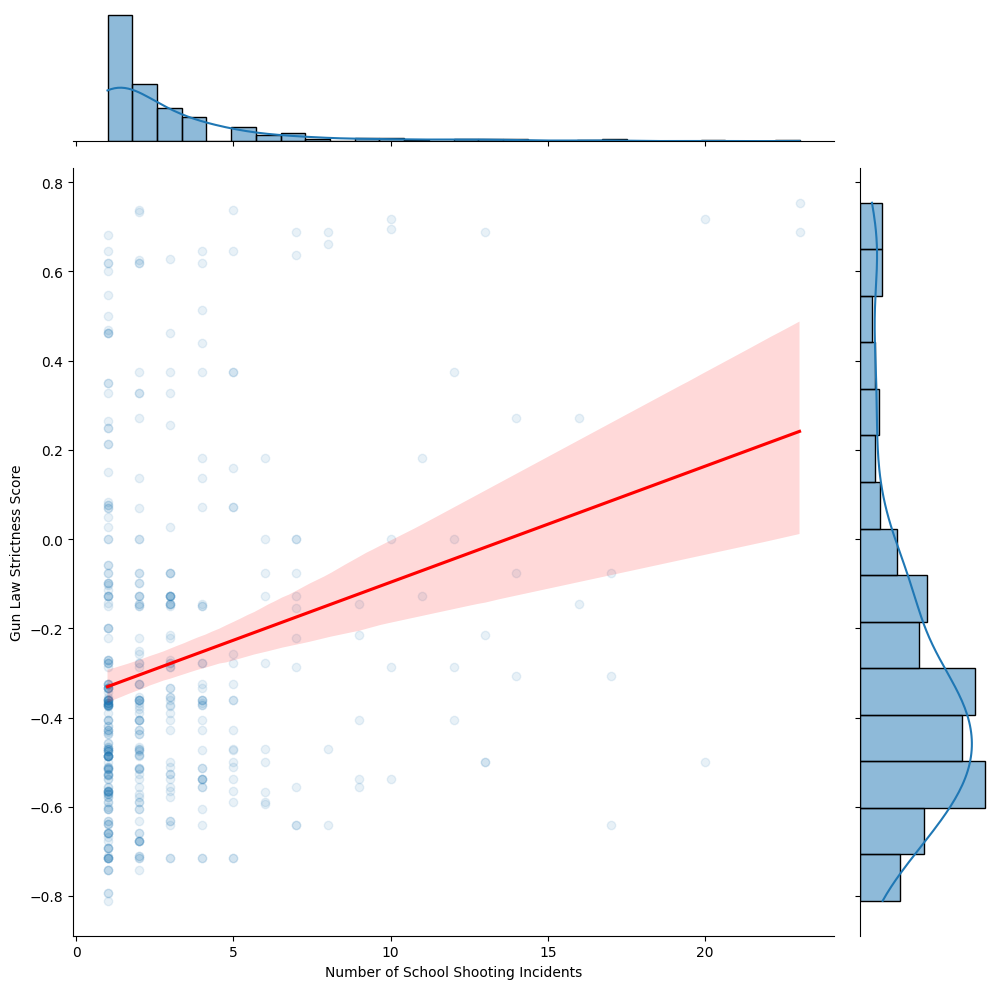

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
shooting_data_file = "/content/public v3 .csv"  # Replace with your file path
law_data_file = "/content/State_Gun_law.xlsx"  # Replace with your file path

# Load the shooting data
shooting_df = pd.read_csv(shooting_data_file, delimiter=';')

# Load the gun law data
law_df = pd.read_excel(law_data_file)

# Preprocess the data
law_years = [year for year in range(2006, 2023)]
law_df[law_years] = law_df[law_years].apply(pd.to_numeric, errors='coerce')

law_melted = law_df.melt(id_vars=['State', 'Abbreviation'], value_vars=law_years,
                         var_name='Year', value_name='Strictness')
law_melted['Year'] = pd.to_numeric(law_melted['Year'], errors='coerce')

incident_counts_yearly = shooting_df.groupby(['Year', 'state']).size().reset_index(name='incident_count')

merged_yearly_df = pd.merge(incident_counts_yearly, law_melted,
                            left_on=['state', 'Year'], right_on=['Abbreviation', 'Year'], how='inner')

# Define reg_df as the data to be used for plotting
reg_df = merged_yearly_df.rename(columns={'incident_count': 'sch', 'Strictness': 'realhrwage'})

# Create the scatterplot with regression line
sns.jointplot(
    data=reg_df,  # Dataset
    x='sch',  # Number of school shooting incidents
    y='realhrwage',  # Gun law strictness score
    kind="reg",  # Regression plot with histograms
    scatter_kws=dict(alpha=0.1),  # Transparency of points
    line_kws=dict(color='red'),  # Regression line color
    height=10  # Height of the plot
)

# Add labels for clarity
plt.xlabel('Number of School Shooting Incidents')  # Label for the x-axis
plt.ylabel('Gun Law Strictness Score')  # Label for the y-axis

# Show the plot
plt.show()
